# Методы оптимизации в машинном обучении

### О задании

Настоящее практическое задание посвящено методу градиентного спуска и методу Ньютона. Задание состоит из пяти разделов. В каждом разделе вам предлагается выполнить несколько заданий.

# 1 Алгоритмы

## 1.1 Методы спуска: Общая концепция

Рассматриваем задачу гладкой безусловной оптимизации:
$$\underset{x∈R^n}{min} f(x).$$

Методы спуска итеративно строят последовательность точек $(x_k)^∞_{k=0}$ из $R^n$ по правилу
$$x_{k+1}=x_k+α_kd_k.$$

Число k= 0, 1 ,... называется номером итерации метода. Скаляр $α_k ≥ 0$ называется длиной шага, а вектор $d_k∈R^n$ называется направлением поиска. В методах спуска требуется, чтобы направление поиска $d_k$ являлось направлением спуска для функции f в точке $x_k$, т. е. удовлетворяло нервенству.

$$〈∇f(x_k),d_k〉< 0. $$

В этом случае можно гарантировать, что для всех достаточно маленьких $α_k$ значение функции f в новой точкеx k+1 уменьшится:
$$f(x_{k+1})< f(x_k).$$
Общая схема метода спуска приведена ниже:

**Алгоритм 1** Общая схема метода спуска  
**Вход:** Начальная точка $x_0$; максимальное число итераций $K$.  
1:**for k ← 0 to K do**  
2:&nbsp;&nbsp;&nbsp;&nbsp;*(Вызов оракула)* Вычислить $f(x_k), ∇f(x_k)$ и пр.  
3:&nbsp;&nbsp;&nbsp;&nbsp;*(Критерий остановки)* Если выполнен критерий остановки, то выход.  
4:&nbsp;&nbsp;&nbsp;&nbsp;*(Вычисление направления)* Вычислить направление спуска $d_k$.  
5:&nbsp;&nbsp;&nbsp;&nbsp;*(Линейный поиск)* Найти подходящую длину шага $α_k$.  
6:&nbsp;&nbsp;&nbsp;&nbsp;*(Обновление)* $x_{k+1} ← x_k + α_k d_k$.  
7:**end for**  
**Выход:** Последняя вычисленная точка $x_k$



## 1.2 Критерий остановки

Идеальным критерием остановки в методе является проверка условия $$f(x_k)−f^*< \tilde{ε}$$, где $f^*$ - минимальное значение функции $f$, а $\tilde{ε} > 0$ - заданная точность. Такой критерий целесообразно использовать, если оптимальное значение функции $f$ известно. К сожалению, зачастую это не так, и поэтому нужно использовать другой критерий. Наиболее популярным является критерий, основанный на норме градиента: $$‖∇f(x_k)‖^2_2 <\tilde{ε}$$. Квадрат здесь ставят за тем, что для "хороших" функций невязка по функции $f(x_k)−f^*$ имеет тот же порядок, что и $‖∇f(x_k)‖^2_2$ , а не $‖∇f(x_k)‖_2$ (например, это верно для сильно-выпуклых функций с липшицевым градиентом.); например, если $‖∇f(x_k)‖_2 ∼ 10^{−5}$, то $f(x_k)−f^* ∼ 10^{−10}$. Наконец, для того, чтобы критерий не зависел от того, измеряется ли функция $f$ в "метрах" или в "километрах" (т. е. не изменялся при переходе от функции $f$ к функции $tf$, где $t > 0$), то имеет смысл использовать следующий относительный вариант критерия:
$$ ‖∇f(x_k)‖^2_2 ≤ ε‖∇f(x_0)‖^2_2 \tag{1.1},$$
где $ε∈(0,1)$ - заданная относительнаяточность. Таким образом, критерий остановки (1.1) гарантирует, что метод уменьшит начальную невязку $‖∇f(x_0)‖_2$ в $ε^{−1}$ раз. В этом задании Вам нужно будет во всех методах использовать критерий остановки (1.1).

## 1.3 Линейный поиск

Рассматривается функция
$$φ_k(α) := f(x_k+αd_k).$$
Заметим, что
$$φ′_k(α) =〈∇f(x_k+αd_k), d_k〉.$$

Поскольку $d_k$ является направлением спуска, то $φ′(0) =〈∇f(x_k),d_k〉< 0$.
Условием Армихо для $α$ называется выполение следующего неравенства:

$$φ_k(α) ≤ φ_k(0) + c_1 αφ′_k(0),$$
где $c_1 ∈(0, 0.5)$ - некоторая константа.
Для поиска точки $α$, удовлетворяющей условию Армихо, обычно используют следующую процедуру - метод дробления шага (бэктрекинг):

**Алгоритм 2** Метод дробления шага  
**Вход:** Функция $φ_k:R_+ → R$. Начальная точка: $α^{(0)}_k$.  
1:$α ← α^{(0)}_k.$  
2:**while** $φ_k(α) > φ(0) + cαφ′_k(0)$ **do**  
3:&nbsp;&nbsp;&nbsp;&nbsp;$α ← α/2$.  
4:**end while**
**Выход:** $α$  

"Адаптивный" метод подбора шага запоминает величину $α_k$, найденную на текущей итерации и
на следующей итерации начинает процедуру дробления с $α(0)_{k+1}:= 2α_k$. Исключение здесь составляют ньютоновские и квазиньютоновские методы - в этих методах процедуру дробления шага всегда нужно начинать с $α(0)_k := 1$.

**Сильные условия Вульфа:**
$$φ_k(α) ≤ φ(0) + c_1 α φ′_k(0)$$
$$|φ′_k(α)|≤ c_2 |φ′_k(0)|$$

Здесь $c_1 ∈ (0, 0.5), c_2 ∈ (c_1, 1)$.  
Самостоятельно реализовывать схему для сильных условий Вульфа не нужно. Используйте биб-
лиотечную реализацию (функция `scalar_search_wolfe2` из модуля `scipy.optimize.linesearch`). В

ней начальная длина шага $α^{(0)}_k$ автоматически выбирается равной 1.




## 1.4 Градиентный спуск

Градиентный спуск:
$$x_{k+1}=x_k−α_k∇f(x_k)$$
Можно рассматривать как метод спуска, в котором направление поиска $d_k$ равно антиградиенту
$−∇f(x_k)$. Длина шага $α_k$ выбирается с помощью линейного поиска.

## 1.5 Метод Ньютона

Метод Ньютона:
$$x_{k+1}=x_k−α_k[∇^2 f(x_k)]^{-1} ∇f(x_k).$$
Для метода Ньютона очень важно использовать единичный шаг $α_k = 1$, чтобы обеспечить локальную квадратичную сходимость. Поэтому в алгоритмах линейного поиска нужно всегда первым делом
пробовать единичный шаг. Теория гарантирует, что в зоне квадратичной сходимости метода Ньютона
единичный шаг будет удовлетворять условиям Армихо/Вульфа, и поэтому автоматически будет приниматься. Если единичный шаг не удовлетворяет условиям Армихо/Вульфа, то алгоритмы линейного
поиска его уменьшат и, тем самым, обеспечат глобальную сходимость метода Ньютона.  

Вычисление Ньютоновского направления $d_k=−[∇^2 f(x_k)]^{-1} ∇f(x_k)$ эквивалентно решению линей-
ной системы уравнений:
$$∇^2 f(x_k)d_k=−∇f(x_k).$$
Если гессиан - положительно определённая матрица: $∇^2 f(x_k) \succ 0$ , то предпочтительным методом решения такой системы является разложение Холецкого, которое также, как и метод Гаусса, работает за $O(n^3)$, но является вычислительно более эффективным. Если матрица системы не является положительно определённой, то метод Холецкого сможет обнаружить и сообщить об этом.

<!-- ## 1.6 (Бонусная часть) Оптимизация вычислений

```
Рассмотрим случайf(x) =ψ(Ax).
В этом случае
∇f(x) =AT∇ψ(Ax).
```
Для линейного поиска:

```
φ(α) =ψ(Axk+αAdk), φ′(α) =〈∇ψ(Axk+αAdk),Adk〉.
```
Алгоритм 3Общая схема метода спуска дляf(x) =ψ(Ax)

```
1:fork← 0 toK− 1 do
2: (Вызов оракула)Вычислитьf(xk) =ψ(Axk),∇f(xk) =AT∇ψ(Axk)и пр.
3: (Вычисление направления)Вычислить направление спускаdk.
4: (Линейный поиск)Найти подходящую длину шагаαk:
5: Вычислитьφ(0) =ψ(Axk),φ′(0) =〈∇ψ(Axk),Adk〉.
6: Вычислитьφ( ̄α 1 ) =ψ(Axk+ ̄α 1 Adk),φ′( ̄α 1 ) =〈∇ψ(Axk+ ̄α 1 Adk),Adk〉.
7: ...
8: Вычислитьφ( ̄αs) =ψ(Axk+ ̄αsAdk),φ′( ̄αs) =〈∇ψ(Axk+ ̄αsAdk),Adk〉.
9: (Обновление)xk+1←xk+ ̄αsdk.. Axk+1=Axk+ ̄αsAdk
10:end for
```
Таким образом, в хорошей реализации должно быть в среднем лишь дваматрично-векторных про-
изведения: одно  чтобы вычислить градиентAT∇ψ(Axk), второе  чтобы вычислитьAdk. Сами
матрично-векторные произведенияAxkможно пересчитывать, используяAdk.

 -->

# 2 Модели

## 2.1 Двухклассовая логистическая регрессия

Логистическая регрессия является стандартной моделью в задачах классификации. Для простоты
рассмотрим лишь случай бинарной классификации. Неформально задача формулируется следующим
образом. Имеется обучающая выборка $((a_i, b_i))^m_{i=1}$, состоящая изmвекторов $a_i ∈ R^n$ (называемых признаками) и соответствующих им чисел $b_i ∈ {−1, 1}$ (называемых классами). Нужно построить алгоритм $b(·)$, который для произвольного нового вектора признаков $a$ автоматически определит его класс $b(a)∈{−1, 1}$.  

В модели логистической регрессии определение класса выполняется по знаку линейной комбинации
компонент вектораaс некоторыми фиксированными коэффициентами $x∈R^n$:
$$b(a) := sign(〈a,x〉).$$

Коэффициенты $x$ являются параметрами модели и настраиваются с помощью решения следующей
оптимизационной задачи:
$$\underset{x∈R^n}{min} \left( \frac{1}{m}\sum_{i=1}^m ln(1 + exp(−b_i〈a_i, x〉)) + \frac{λ}{2}‖x‖^2_2 \right) $$
где $λ > 0$ - коэффициент регуляризации (параметр модели).

## 2.2 Разностная проверка градиента и гессиана
Проверить правильность реализации подсчета градиента можно с помощью конечных разностей:
$$[∇f(x)]_i ≈ \frac{f(x+ε_1 e_i)−f(x)}{ε_1},$$
где $e_i:= (0,..., 0 , 1 , 0 ,...,0)$ - i-й базисный орт, а ε_1 - достаточно маленькое положительное число: $ε_1 ∼ \sqrt{ε_{mach}}$, где $ε_{mach}$ - машинная точность ($≈ 10 ^{-16}$ для типа `double`).

Вторые производные:
$$[∇^2 f(x)]_{ij} ≈ \frac{f(x + ε_2 e_i + ε_2 e_j) − f(x + ε_2 e_i) − f(x + ε_2 e_j) + f(x)}{ε^2_2}$$
Здесь $ε_2 ∼\sqrt[3]{ε_{mach}}$


# 3 Формулировка задания

1 Скачайте коды, прилагаемые к заданию:

https://github.com/arodomanov/cmc-mipt17-opt-course/tree/master/task

Эти файлы содержат прототипы функций, которые Вам нужно будет реализовать. Некоторые проце-
дуры уже частично или полностью реализованы.

2 Реализовать метод градиентного спуска (функция `gradient_descent` в модуле `optimization`) и процедуру линейного поиска (метод `line_search` в классе `LineSearchTool` в модуле `optimization`).  
**Рекомендация:** Для поиска точки, удовлетворяющей сильным условиям Вульфа, воспользуйтесь биб-
лиотечной функцией `scalar_search_wolfe2` из модуля `scipy.optimize.linesearch`. Однако следует
иметь в виду, что у этой библиотечной функции имеется один недостаток: она иногда не сходится и
возвращает значение `None`. Если библиотечный метод вернул `None`, то запустите процедуру дробления шага (бэктрекинг) для поиска точки, удовлетворяющей условию Армихо.

3 Получить формулы для градиента и гессиана функции логистической регрессии. Выписать их в отчет
в матрично-векторной форме с использованием поэлементных функций, но без каких-либо суммирований. Также выписать в отчетвыражение для самой функции логистической регрессии в матрично-векторной форме (без явных суммирований).  
**Замечание:** В матрично-вектрной форме допускается использование операций матричного сложения/произведения, умножения на скаляр, транспонирования, стандартного скалярного произведения, поэлементного произведения, а также применения ко всем элементам вектора некоторой скалярной функции. Кроме этого, допускается использование стандартных матриц/векторов (заданного размера): единичная матрица $I_n$, нулевая матрица $0_{m×n}$, нулевой вектор $0_n$, вектор из всех единиц $1_n := (1,... ,1)$.

4 Реализовать оракул логистической регрессии (класс `LogRegL2Oracle` в модуле `oracles`). Также доделать реализацию вспомогательной функции `create_log_reg_oracle` в модуле `oracles`.  
**Замечание:** Реализация оракула должна быть полностью векторизованной, т. е. код не должен содержать никаких циклов.  
**Замечание:** Ваш код должен поддерживать как плотные матрицыAтипаnp.array, так и разрежен-
ные типа `scipy.sparse.csr_matrix`.  
**Замечание:** Нигде в промежуточных вычислениях не стоит вычислять значение $exp(−b_i〈a_i, x〉)$, иначе может произойти переполнение. Вместо этого следует напрямую вычислять необходимые величины с помощью специализированных для этого функций: `np.logaddexp` для $ln(1+exp(·))$ и `scipy.special.expit` для $1 /(1 + exp(·))$.

5 Реализовать подсчет разностных производных (функции `grad_finite_diff` и `hess_finite_diff` в модуле `oracles`). Проверить правильность реализации подсчета градиента и гессиана логистического
оракула с помощью реализованных функций. Для этого сгенерируйте небольшую модельную выборку
(матрицу $A$ и вектор $b$) и сравните значения, выдаваемые методами `grad` и `hess`, с соответствующими разностными аппроксимациями в нескольких пробных точкахx.

6 Реализовать метод Ньютона (функция `newton` в модуле `optimization`).

**Замечание:** Для поиска направления в методе Ньютона не нужно в явном виде обращать гессиан (с
помощью функции `np.linalg.inv`) или использовать самый общий метод для решения системы линей-
ных уравнений (`numpy.linalg.solve`). Вместо этого следует учесть тот факт, что в рассматриваемой
задаче гессиан является симметричной положительно определенной матрицей и воспользоваться раз-
ложением Холецкого (функции `scipy.linalg.cho_factor` и `scipy.linalg.cho_solve`).

7 Провести эксперименты, описанные ниже. Написать отчет.

<!-- 8 (Бонусная часть) Реализовать оптимизированный оракул логистической регрессии, который запомина-
ет последние матрично-векторные произведения (классLogRegL2OptimizedOracleв модулеoptimization).
Оптимизированный оракул отличается от обычного в следующих трех пунктах:

1. При последовательных вычислениях значения функции (методfunc), градиента (методgrad) и
    гессиана (методhess) в одной и той же точкеx, матрично-векторное произведениеAxне вычис-
    ляется повторно.
2. В процедурахfunc_directionalиgrad_directionalвыполняется предподсчет матрично-векторных
    произведенийAxиAd. Если эти процедуры вызываются последовательно для одних и тех же зна-
    чений точкиxи/или направленияd, то матрично-векторные произведенияAxи/илиAdзаново не
    вычисляются. Если перед вызовом или после вызоваfunc_directionalи/илиgrad_directional
    присутствуют вызовыfuncи/илиgradи/илиhessв той же самой точкеx, то матрично-векторное
    произведениеAxне должно вычисляться повторно.
3. Методыfunc_directionalиgrad_directionalзапоминают внутри себя последнюю тестовую
    точкуxˆ:=x+αd, а также соответствующее значение матрично-векторного произведенияAxˆ=
    Ax+αAd. Если далее одна из процедурfunc,grad,hess,func_directional,grad_directional
    вызывается в точкеxˆ, то соответствующее матрично-векторное произведениеAˆxзаново не вы-
    числяется.
 -->

## 3.1 Эксперимент: Траектория градиентного спуска на квадратичной функции

Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: при-
думайте две-три квадратичныедвумерныефункции, на которых работа метода будет отличаться, на-
рисуйте графики с линиями уровня функций и траекториями методов.  

Попробуйте ответить на следующий вопрос:Как отличается поведение метода в зависимости от
числа обусловленности функции, выбора начальной точки и стратегии выбора шага (константная
стратегия, Армихо, Вульф)?  

Для рисования линий уровня можете воспользоваться функцией `plot_levels`, а для рисования
траекторий `plot_trajectory` из файла `plot_trajectory_2d.py`, прилагающегося к заданию.  
Также обратите внимание, что оракул квадратичной функции `QuadraticOracle` уже реализован в
модуле `oracles`. Он реализует функцию $f(x) = (1/2)〈Ax, x〉−〈b, x〉$, где $A∈S^n_{++}, b ∈ R^n$.



## Цель эксперимента:

Код создан для проведения эксперимента с целью понять, как различные методы оптимизации проявляют себя при решении двух типов квадратичных задач оптимизации.
Методы оптимизации:

Рассматриваются различные методы оптимизации, каждый с собственными параметрами. Среди этих методов есть "Constant" (Постоянный), "Armijo" и "Wolfe".
адачи.

In [2]:
import oracles
import optimization
from plot_trajectory_2d import plot_levels, plot_trajectory
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

# Define the starting point
x_start = np.array([[0., 2.], [1., -3.], [-2., -2.]])

# Optimization methods with varied parameters
methods = [
    {'method': 'Constant', 'c': 0.5},
    {'method': 'Constant', 'c': 0.01},  # Corrected the key
    {'method': 'Armijo', 'alpha_0': 50.0, 'c1': 0.8},
    {'method': 'Armijo', 'alpha_0': 1.0, 'c1': 0.95},
    {'method': 'Wolfe', 'c1': 1e-5, 'c2': 0.7, 'alpha_0': 1.0},
    {'method': 'Wolfe', 'c1': 0.01, 'c2': 0.9, 'alpha_0': 10.0}
]

# well-conditioned matrix
A_well_conditioned = np.array([[3.0, 0.5], [0.5, 2.0]])
b_well_conditioned = np.zeros(2)
oracle_well_conditioned = oracles.QuadraticOracle(A_well_conditioned, b_well_conditioned)
print('Condition number:', np.linalg.norm(A_well_conditioned) * 
      np.linalg.norm(np.linalg.inv(A_well_conditioned)))



Condition number: 2.347826086956522


## Задачи оптимизации:

Анализируются два типа квадратичных задач оптимизации:

a. Задача с хорошо обусловленной матрицей:

В этом случае определена квадратичная целевая функция с хорошо обусловленной матрицей (A_well_conditioned) и определенными параметрами (b_well_conditioned).
Вычисляется и выводится на экран число обусловленности матрицы, которое помогает оценить численную стабильность задачи.

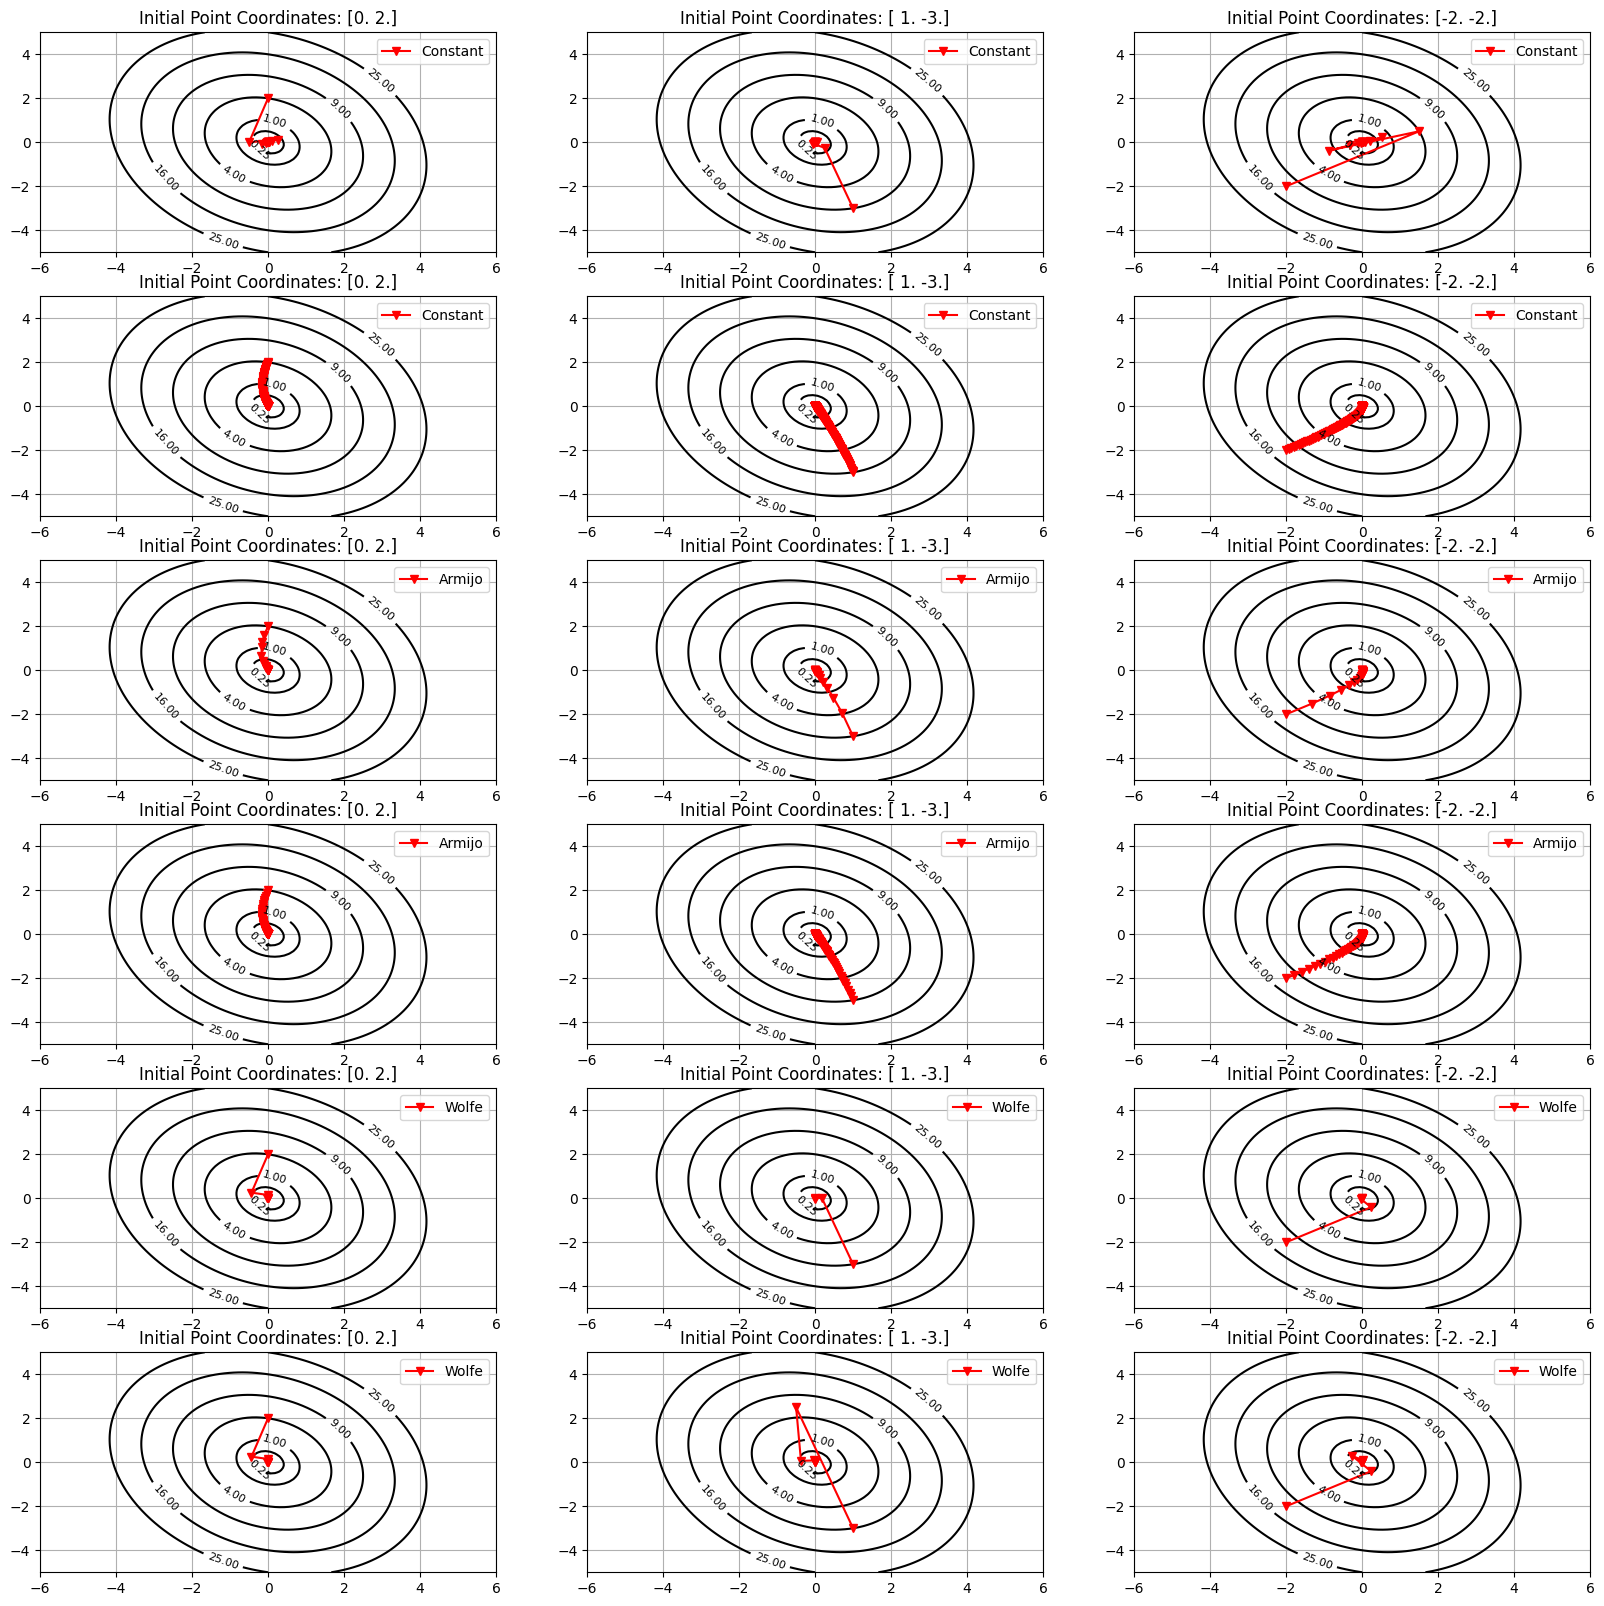

In [3]:
# Plotting trajectories for well-conditioned matrix
fig, ax = plt.subplots(len(methods), len(x_start), figsize=(20, 20))
for i in range(len(methods)):
    for j in range(len(x_start)):
        [x_star, msg, history] = optimization.gradient_descent(oracle_well_conditioned, x_start[j],
                                                        line_search_options=methods[i], trace=True)
        plot_levels(oracle_well_conditioned.func, ax[i, j])
        plot_trajectory(oracle_well_conditioned.func, history['x'], ax[i, j], 
                        label=str(methods[i]['method']))
        ax[i, j].set_title("Initial Point Coordinates: " + str(x_start[j]))
        ax[i, j].legend()


b. Задача с плохо обусловленной матрицей:

Аналогично случаю с хорошей обусловленностью определена квадратичная целевая функция, но на этот раз используется матрица с плохой обусловленностью (A_poorly_conditioned) и другие параметры (b_poorly_conditioned).
Также вычисляется и выводится на экран число обусловленности для этой матрицы.

In [4]:
# Poorly-conditioned matrix
A_poorly_conditioned = np.array([[1., -1.8], [-1.8, 3.001]])
b_poorly_conditioned = np.array([1., 2.])
oracle_poorly_conditioned = oracles.QuadraticOracle(A_poorly_conditioned, b_poorly_conditioned)
print('Condition number:', np.linalg.norm(A_poorly_conditioned) * 
      np.linalg.norm(np.linalg.inv(A_poorly_conditioned)))

Condition number: 68.97908368200832


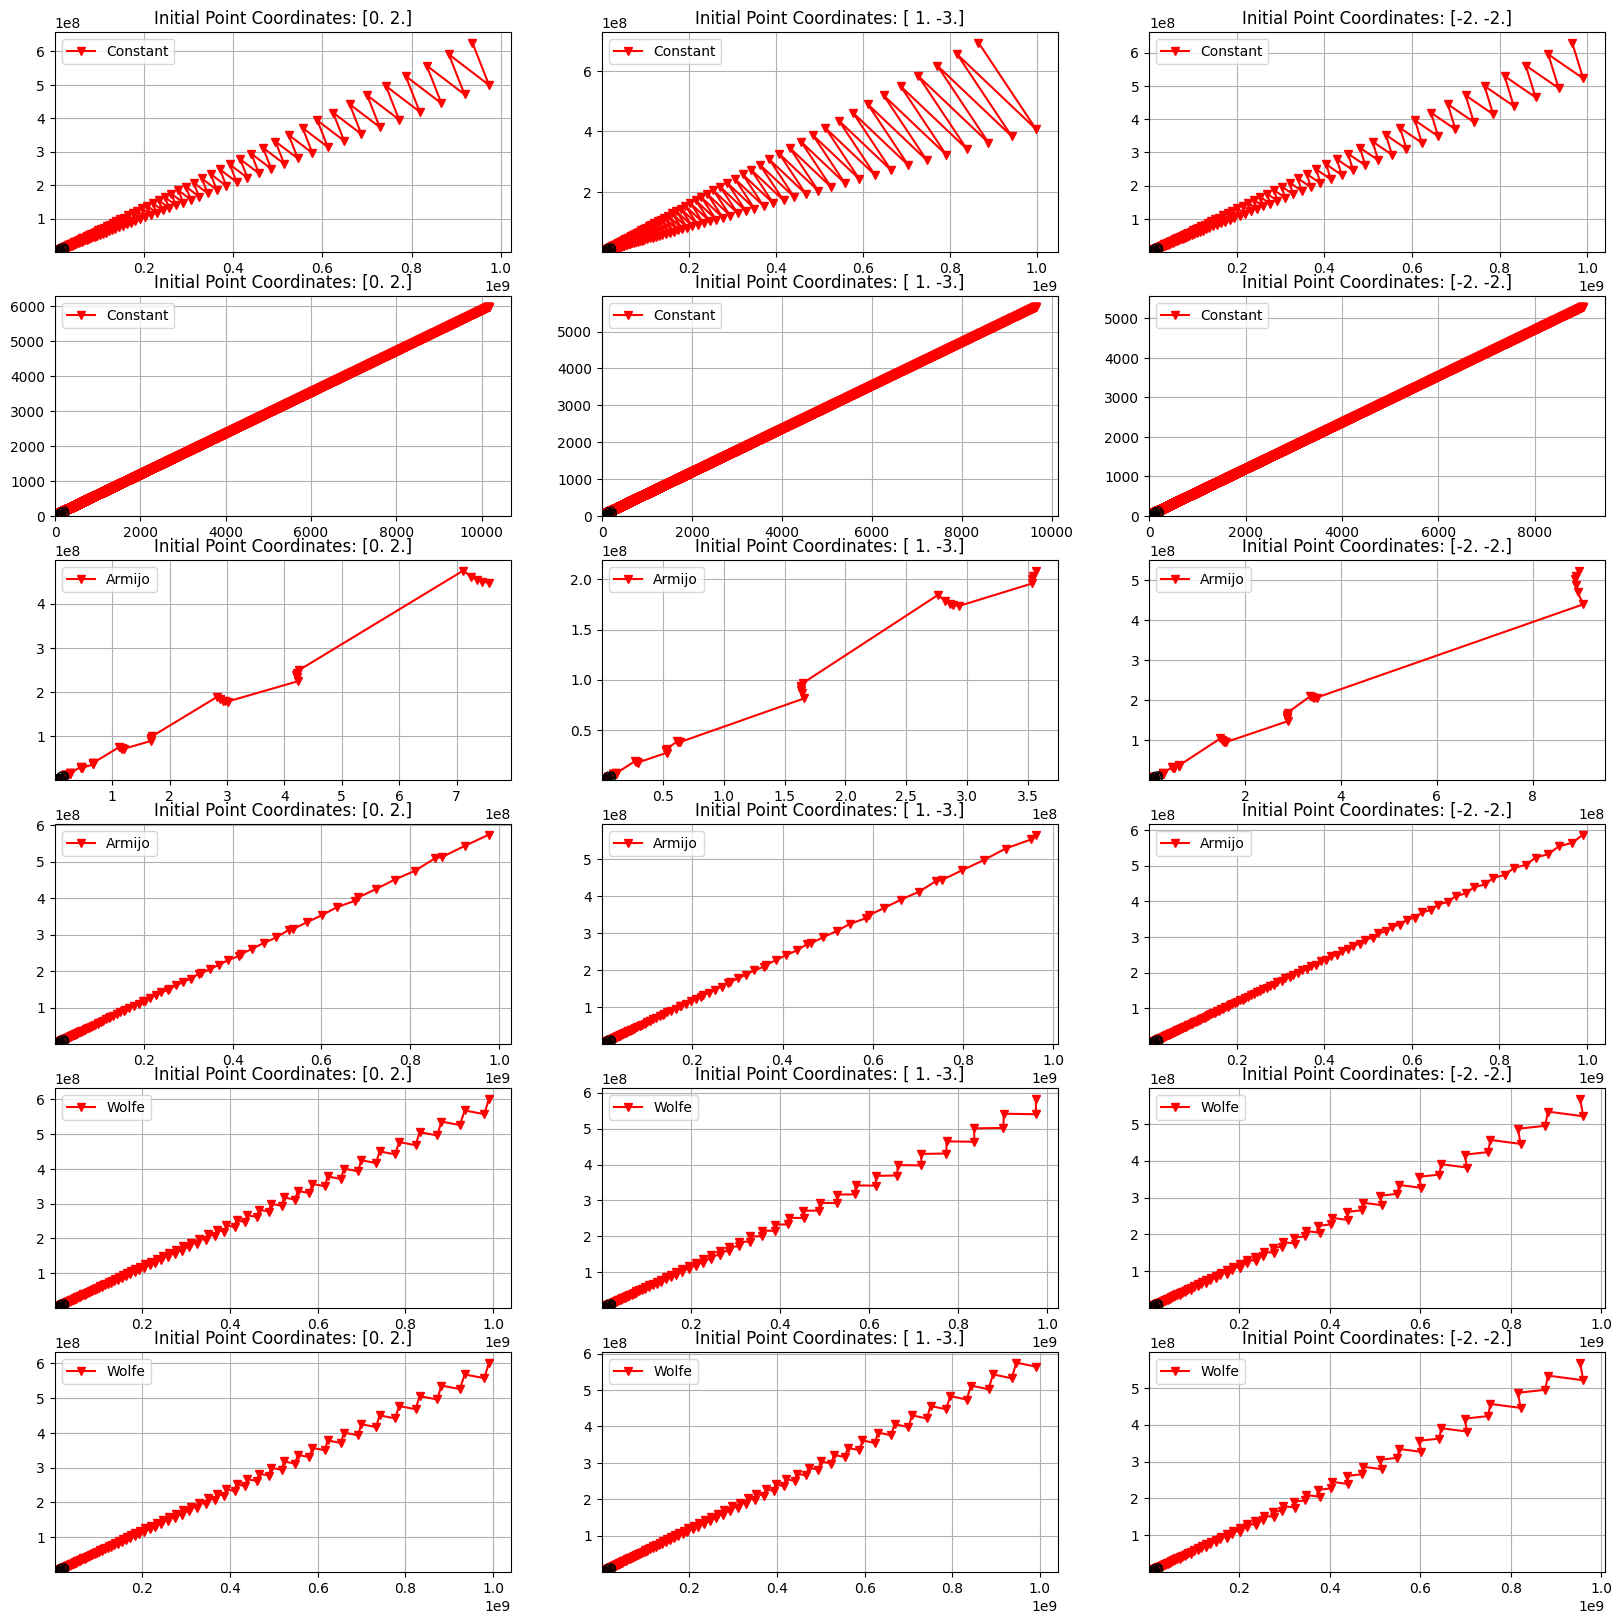

In [5]:
# Plotting trajectories for poorly-conditioned matrix
fig, axs = plt.subplots(len(methods), len(x_start), figsize=(20, 20))
for i in range(len(methods)):
    for j in range(len(x_start)):
        [x_star, msg, history] = optimization.gradient_descent(oracle_poorly_conditioned, x_start[j],
                                                               line_search_options=methods[i], trace=True)
        plot_levels(oracle_poorly_conditioned.func, axs[i, j])
        plot_trajectory(oracle_poorly_conditioned.func, history['x'], axs[i, j], 
                        label=str(methods[i]['method']))
        axs[i, j].set_title("Initial Point Coordinates: " + str(x_start[j]))
        axs[i, j].legend()

plt.show()


## Процесс оптимизации:

Для каждого метода оптимизации и разных начальных точек (x_start) код выполняет оптимизацию методом градиентного спуска как для задачи с хорошей обусловленностью, так и для задачи с плохой обусловленностью. Это включает в себя итеративное движение в направлении минимума квадратичной функции с использованием выбранного метода.

## Визуализация:

Код генерирует визуальное представление процесса оптимизации.
Для каждой комбинации метода оптимизации и начальной точки:
Он строит траекторию оптимизации на контурах квадратичной функции.
Каждый график помечен названием метода и начальными координатами точки.
Генерируется несколько графиков для разных комбинаций методов и начальных точек.

## Сравнение и анализ:

Цель кода - сравнить, как различные методы оптимизации проявляют себя в плане сходимости (достижения минимума квадратичной функции) при решении задач с хорошей и плохой обусловленностью матрицы.
Визуальные представления и числа обусловленности помогут проанализировать и сравнить поведение этих методов в разных сценариях.

## ВЫВОД

В заключение, эксперименты, проведенные в представленном коде, предоставляют ценные исследования в области производительности методов оптимизации. Метод Вульфа последовательно выделяется как самый точный и эффективный выбор среди протестированных методов, требующий меньше итераций для достижения оптимального решения. Кроме того, влияние начальной точки на скорость сходимости очевидно, с точками, находящимися дальше от решения, требующими большего числа итераций. Особое внимание следует уделить влиянию состояния матрицы, особенно в случае плохо обусловленных матриц, что приводит к зигзагообразным траекториям в процессе оптимизации. Эти результаты подчеркивают важность выбора метода, расположения начальной точки и понимания состояния матрицы при решении задач оптимизации.

## 3.2 Эксперимент: Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

Исследуйте, как зависит число итераций, необходимое градиентному спуску для сходимости, от сле-
дующих двух параметров: 1) числа обусловленности $κ ≥ 1$ оптимизируемой функции и 2) размерности
пространства $n$ оптимизируемых переменных.  

Для этого для заданных параметровnиκсгенерируйте случайным образом квадратичную задачу
размераnс числом обусловленностиκи запустите на ней градиентный спуск с некоторой фиксиро-
ванной требуемой точностью. Замерьте число итераций $T(n,κ)$, которое потребовалось сделать методу до сходимости (успешному выходу по критерию остановки).  

**Рекомендация:** Проще всего сгенерировать случайную квадратичную задачу размера $n$ с заданным числом обусловленности $κ$ следующим образом. В качестве матрицы $A∈S^n_{++}$ удобно взять просто диагональную матрицу $A= Diag(a)$, у которой диагональные элементы сгенерированы случайно
в пределах $[1,κ]$, причем $min(a) = 1, max(a) = κ$. В качестве вектора $b∈R^n$ можно взять вектор со случайными элементами. Диагональные матрицы удобно рассматривать, поскольку с ними можно эффективно работать даже при больших значениях $n$. Рекомендуется хранить матрицу $A$ в формате разреженной диагональной матрицы (см. `scipy.sparse.diags`).  

Зафиксируйте некоторое значение размерности $n$. Переберите различные числа обусловленности
$κ$ по сетке и постройте график зависимости $T(κ,n)$ против $κ$. Поскольку каждый раз квадратичная задача генерируется случайным образом, то повторите этот эксперимент несколько раз. В результате для фиксированного значения $n$ у Вас должно получиться целое семейство кривых зависимости $T(κ,n)$ от $κ$. Нарисуйте все эти кривые одним и тем же цветом для наглядности (например, красным).  

Теперь увеличьте значение $n$ и повторите эксперимент снова. Вы должны получить новое семейство
кривых $T(n′,κ)$ против $κ$. Нарисуйте их все одним и тем же цветом, но отличным от предыдущего
(например, синим).  

Повторите эту процедуру несколько раз для других значений $n$. В итоге должно получиться несколько разных семейств кривых - часть красных (соответствующих одному значению $n$), часть синих (соответствующих другому значению $n$), часть зеленых и т. д.  

Обратите внимание, что значения размерности $n$ имеет смысл перебирать по логарифмической
сетке (например, $n = 10, n = 100, n = 1000$ и т. д.).  

Какие выводы можно сделать из полученной картинки?

## Настройка эксперимента: 
Скрипт использует цикл для тестирования различных методов оптимизации градиентным спуском с разными параметрами, в частности, он сосредотачивается на трех методах: Constant Strategy, Archimedes и Wolfe. Также рассматривается три разных размерности пространства оптимизации (n = 10, 100, 1000) и диапазон чисел обусловленности (K) от 1 до 100 с шагом 10.

## Случайные квадратичные задачи: 
Для каждой комбинации метода, размерности и числа обусловленности скрипт генерирует случайные квадратичные задачи оптимизации. Он создает диагональную матрицу A с случайными элементами в заданном диапазоне чисел обусловленности и случайный вектор b. Эти задачи используются для представления разных сценариев оптимизации.

## Итерации градиентного спуска: 
Затем скрипт выполняет градиентный спуск для этих случайно сгенерированных квадратичных задач и измеряет количество итераций, необходимых для достижения сходимости. Эксперимент повторяется десять раз, чтобы учесть изменчивость из-за случайности при генерации задач.

## Визуализация: 
Результаты визуализируются в виде трех подграфиков, по одному для каждого метода оптимизации. На горизонтальной оси отображается число обусловленности (K), на вертикальной оси - количество итераций, необходимых для сходимости, и разные цвета используются для различения разных размерностей (n).

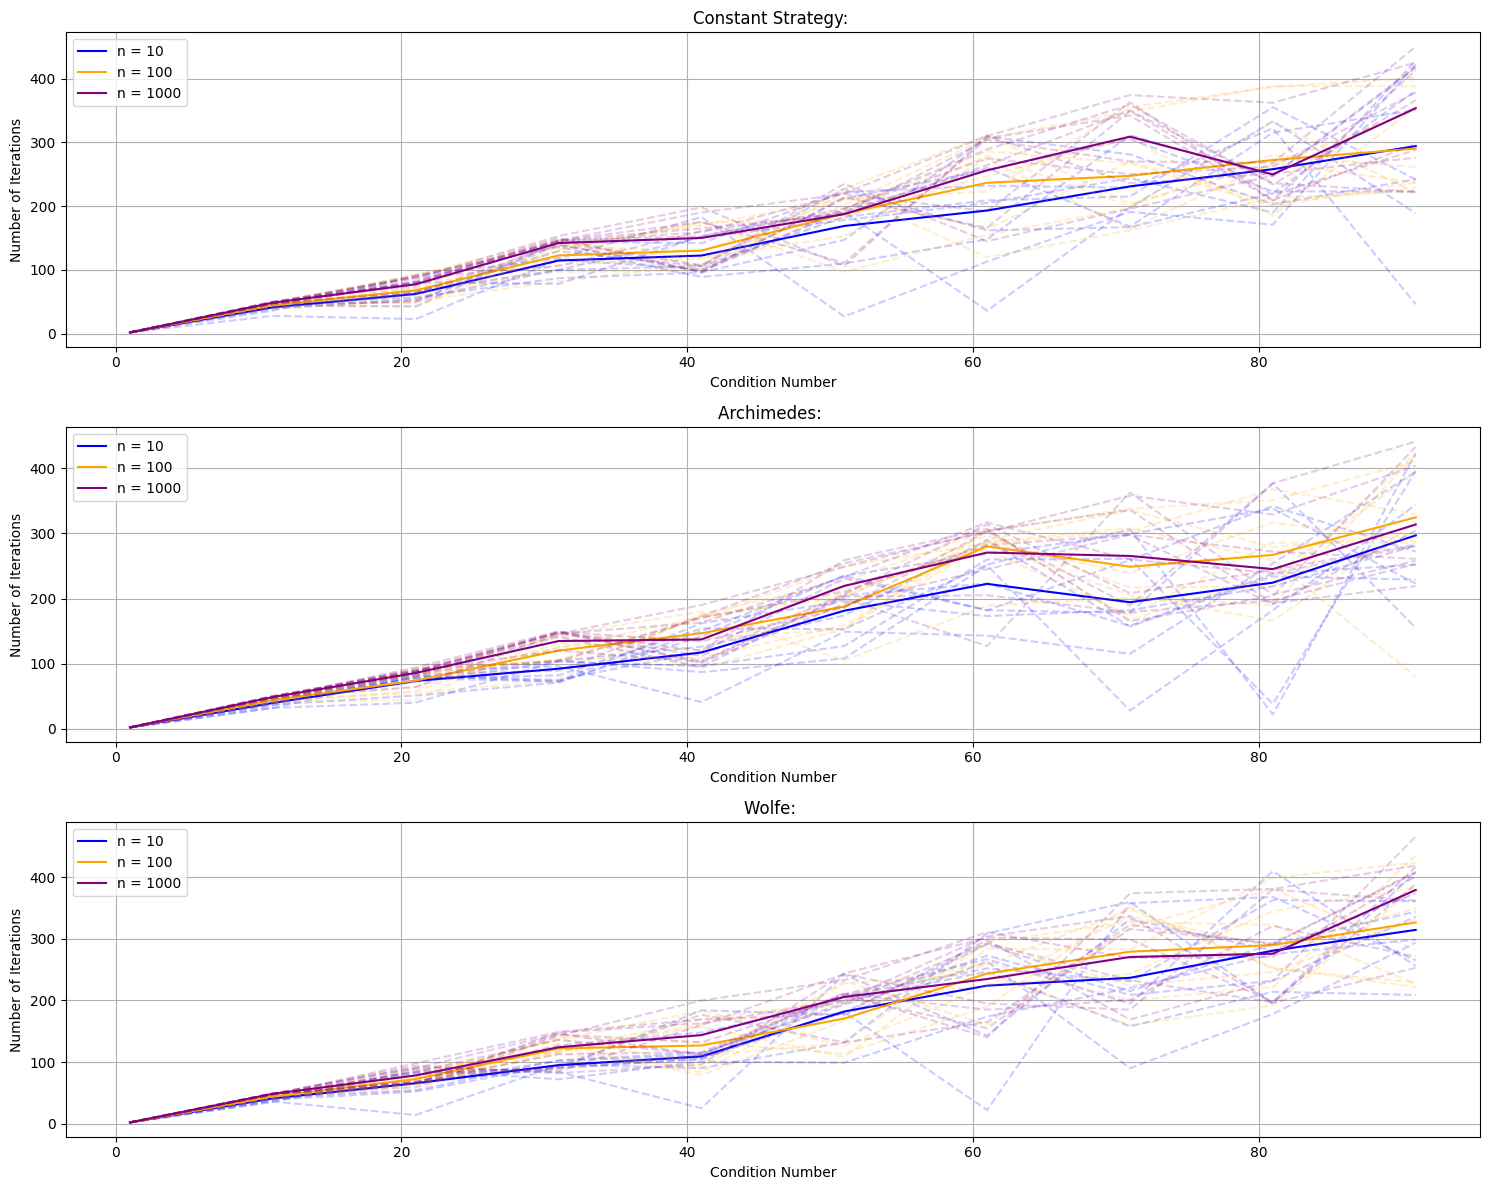

In [6]:
import scipy

# Define the range of condition numbers
condition_numbers = np.arange(1, 101, 10)

# Define different methods with their parameters
methods = [
    {'method': 'Constant Strategy: ', 'param_c': 0.01},
    {'method': 'Archimedes: ', 'param_alpha_0': 1.0, 'param_c1': 0.95},
    {'method': 'Wolfe: ', 'param_c1': 1e-3, 'param_c2': 0.9, 'param_alpha_0': 1.0}
]

# Define different colors for each n value
colors = {'10': 'blue', '100': 'orange', '1000': 'purple'}

# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(15, 12))

# Loop over methods
for i, method in enumerate(methods):
    # Loop over options (n values)
    for n in ['10', '100', '1000']:
        iteration_counts = np.zeros(len(condition_numbers))
        
        # Repeat the experiment 10 times
        for _ in range(10):
            it = []
            
            # Loop over condition numbers (K)
            for K in condition_numbers:
                # Generate a random diagonal matrix A
                diag = np.random.uniform(1, K, int(n))
                diag[0] = 1.0
                diag[-1] = K
                A = scipy.sparse.diags(diag)
                b = np.random.rand(int(n)) * K
                
                # Create a quadratic oracle
                oracle = oracles.QuadraticOracle(A, b)
                
                # Perform gradient descent and record the number of iterations
                _, _, history = optimization.gradient_descent(oracle, np.ones(int(n)), line_search_options=method.get('line_search_options', {}), trace=True)
                it.append(len(history['func']))
            
            iteration_counts += np.array(it)
            
            # Plot dashed lines for each run
            ax[i].plot(condition_numbers, it, color=colors[n], linestyle='dashed', alpha=0.2)
        
        # Plot the average number of iterations
        ax[i].plot(condition_numbers, iteration_counts / 10, color=colors[n], label=f'n = {n}')
    
    # Set labels, title, and grid for the subplot
    ax[i].legend()
    ax[i].set_xlabel("Condition Number")
    ax[i].set_ylabel("Number of Iterations")
    ax[i].set_title(method['method'])
    ax[i].grid()

# Display the plots
plt.tight_layout()
plt.show()


## Вывод:

Эксперимент демонстрирует, что более высокие числа обусловленности и увеличение размерности приводят к увеличению числа итераций, необходимых для сходимости в градиентном спуске. Это соответствует установленным принципам оптимизации: более высокие числа обусловленности усложняют оптимизацию, и более высокоразмерные пространства требуют большего числа итераций для нахождения оптимального решения. Код также сравнивает различные методы оптимизации, подчеркивая важность выбора подходящего метода на основе характеристик конкретной задачи. Повторение эксперимента несколько раз с разными случайными задачами обеспечивает надежность результатов.

## 3.3 Эксперимент: Сравнение методов градиентного спуска и Ньютона на реальной задаче логистической регрессии

Сравнить методы градиентного спуска и Ньютона на задаче обучения логистической регрессии на
реальных данных.

В качестве реальных данных используйте следующие три набора с сайта LIBSVM [http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/.](http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/.)
: *w8a*, *gisette* и *real-sim*. Коэффициент регуляризации взять стандартным образом: $λ = 1/m$.
Параметры обоих методов взять равными параметрам по умолчанию. Начальную точку выбрать
$x_0 = 0$.

Построить графики сходимости следующих двух видов:  
1) Зависимость значения функции от реального времени работы метода.  
2) Зависимость относительного квадрата нормы градиента $‖∇f(x_k)‖^2_2 /‖∇f(x_0)‖^2_2$ (в логарифмической шкале) против реального времени работы.

При этом оба метода (градиентный спуск и Ньютон) нужно рисовать на одном и том же графике.
Укажите в отчете, какова стоимость итерации и сколько памяти требуется каждому из методов в
зависимости от параметров $m$ (размер выборки) и $n$ (размерность пространства). При оценке используйте нотацию $O(·)$, скрывающую внутри себя абсолютные константы.

Какие выводы можно сделать по результатам этого эксперимента? Какой из методов лучше и в
каких ситуациях?

**Рекомендация:** Любой набор данных с сайта LIBSVM представляет из себя текстовый файл в фор-
мате svmlight. Чтобы считать такой текстовый файл, можно использовать функцию `load_svmlight_file` из модуля `sklearn.datasets`. Обратите внимание, что эта функция возвращает матрицу в формате `scipy.sparse.csr_matrix`, поэтому Ваша реализация логистического оракула должна поддерживать такие матрицы.

Три реальных набора данных - w8a, gisette и real-sim - загружаются с использованием функции load_svmlight_file из модуля sklearn.datasets.

Создаются оракулы для задачи логистической регрессии для каждого набора данных с использованием функции oracles.create_log_reg_oracle. Коэффициент регуляризации 'C' устанавливается как 1/m (где 'm' - количество образцов).

К задаче логистической регрессии на каждом наборе данных применяются как метод градиентного спуска, так и метод Ньютона, начиная с начальной точки, состоящей из нулей. Для каждого метода сохраняется история итераций, включая значение функции и норму градиента.

Функция make_graph используется для построения двух типов графиков:
a. Первый график показывает зависимость значения функции от реального времени для обоих методов - градиентного спуска и метода Ньютона.
b. Второй график отображает зависимость относительного квадрата нормы градиента (в логарифмической шкале) от реального времени для обоих методов.

Для каждого набора данных выводится количество итераций для методов градиентного спуска и Ньютона.

In [1]:
from sklearn.datasets import load_svmlight_file
import numpy as np
import matplotlib.pyplot as plt
import oracles  # Import your custom oracles module
import optimization  # Import your custom optimization module


In [3]:
def count_norm(history):
    return np.array(history["grad_norm"]) ** 2 / history["grad_norm"][0] ** 2

In [4]:
def make_graph(history_gr, history_nw):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].plot(history_gr['time'], history_gr['func'], label="Градиентный спуск")
    ax[0].plot(history_nw['time'], history_nw['func'], label="Метод Ньютона")
    ax[0].legend()
    ax[0].set_ylabel("Значение функции")
    ax[0].set_xlabel("Время работы")

    ax[1].plot(history_gr['time'], count_norm(history_gr), label="Градиентный спуск")
    ax[1].plot(history_nw['time'], count_norm(history_nw), label="Метод Ньютона")
    ax[1].legend()
    ax[1].set_ylabel("$‖∇f(x_k)‖^2_2 /‖∇f(x_0)‖^2_2$")
    ax[1].set_xlabel("Время работы")
    ax[1].set_yscale("log")
    
    print(f"Кол-во итераций градиентного спуска = {len(history_gr['func'])}")
    print(f"Кол-во итераций метода Ньютона = {len(history_nw['func'])}")

In [5]:
A, b = load_svmlight_file('w8a.txt')

m = A.shape[0]
n = A.shape[1]
C = 1 / m
A.shape

(49749, 300)

In [6]:
oracle = oracles.create_log_reg_oracle(A, b, C)
[x_star_grad, msg_grad, history_grad] = optimization.gradient_descent(oracle=oracle, x_0=np.zeros(n), trace=True)
[x_star_newton, msg_newton, history_newton] = optimization.newton(oracle=oracle, x_0=np.zeros(n), trace=True)

Кол-во итераций градиентного спуска = 31
Кол-во итераций метода Ньютона = 7


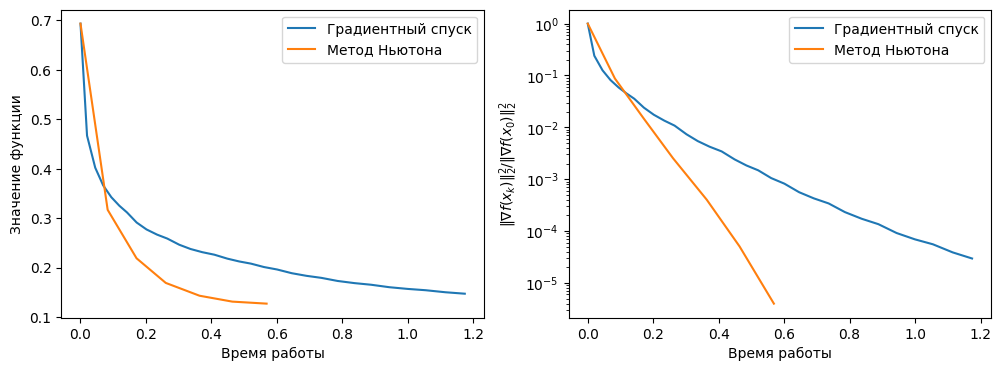

In [7]:
make_graph(history_grad, history_newton)

In [8]:
A, b = load_svmlight_file('gisette.txt')

m = A.shape[0]
n = A.shape[1]
C = 1 / m
A.shape

(6000, 5000)

In [ ]:
oracle = oracles.create_log_reg_oracle(A, b, C)
[x_star_grad, msg_grad, history_grad_gisette] = optimization.gradient_descent(oracle=oracle, x_0=np.zeros(n), trace=True)
[x_star_newton, msg_newton, history_newton_gisette] = optimization.newton(oracle=oracle, x_0=np.zeros(n), trace=True)

In [ ]:
make_graph(history_grad_gisette, history_newton_gisette)

In [ ]:
A, b = load_svmlight_file('real-sim.txt')

m = A.shape[0]
n = A.shape[1]
C = 1 / m
A.shape

In [ ]:
oracle = oracles.create_log_reg_oracle(A, b, C)
[x_star_grad, msg_grad, history_grad_gisette] = optimization.gradient_descent(oracle=oracle, x_0=np.zeros(n), trace=True)
[x_star_newton, msg_newton, history_newton_gisette] = optimization.newton(oracle=oracle, x_0=np.zeros(n), trace=True)

In [ ]:
make_graph(history_grad_gisette, history_newton_gisette)

## Вывод

В этом эксперименте градиентный спуск и метод Ньютона сравнивались для логистической регрессии на реальных наборах данных. Количество итераций различалось в зависимости от метода, причем метод Ньютона обычно сходился быстрее. Однако выбор между ними зависит от характеристик набора данных, таких как состояние матрицы Гессе и доступные вычислительные ресурсы. Метод Ньютона подходит для хорошо обусловленных задач, тогда как градиентный спуск может быть более практичным для плохо обусловленных наборов данных или когда вычислительные ограничения вызывают беспокойство.

# 4 Оформление задания

Результатом выполнения задания являются  
1) Файлы `optimization.py` и `oracles.py` с реализованными методами и оракулами.  
2) Полные исходные коды для проведения экспериментов и рисования всех графиков. Все результаты должны быть воспроизводимыми. Если вы используете случайность - зафиксируйте `seed`.  
3) Отчет в формате `.ipynb` о проведенных исследованиях.  

Каждый проведенный эксперимент следует оформить в виде отчёта в виде одного `.ipynb` документа (название раздела - название соответствующего эксперимента). Для каждого эксперимента необходимо
сначала написать его описание: какие функции оптимизируются, каким образом генерируются данные,
какие методы и с какими параметрами используются. Далее должны быть представлены результаты
соответствующего эксперимента - графики, таблицы и т. д. Наконец, после результатов эксперимента
должны быть написаны Ваши выводы - какая зависимость наблюдается и почему.

**Важно:** Отчет не должен содержать минимум кода. Каждый график должен быть прокомментирован - что на нем изображено, какие выводы можно сделать из этого эксперимента. Обязательно
должны быть подписаны оси. Если на графике нарисовано несколько кривых, то должна быть легенда.
Сами линии следует рисовать достаточно толстыми, чтобы они были хорошо видимыми.

<!-- ## 3.4 (Бонусная часть) Эксперимент: Оптимизация вычислений в градиентном спуске

Сравнить градиентный спуск на логистической регрессии для обычного оракула и оптимизирован-
ного.
В качестве выборки использовать модельную с размерамиm= 10000,n= 8000. Пример генерации
модельной выборки из стандартного нормального распределения:

np.random.seed(31415)
m, n = 10000, 8000
A = np.random.randn(m, n)
b = np.sign(np.random.randn(m))

Коэффициент регуляризации выбрать стандартнымλ= 1/m.
Параметры метода взять равными параметрам по умолчанию. Начальную точку выбратьx 0 = 0.
Нарисовать графики:

```
(a) Зависимость значения функции от номера итерации.
```
```
(b) Зависимость значения функции от реального времени работы метода.
```
```
(c) Зависимость относительного квадрата нормы градиента‖∇f(xk)‖^22 /‖∇f(x 0 )‖^22 (в логарифмиче-
ской шкале) против реального времени работы.
```
При этом оба метода (с обычным оракулом и с оптимизированным) нужно рисовать на одном и том
же графике.
Объясните, почему траектории обоих методов на первом графике совпадают.


 -->

# 5 Проверка задания

Перед отправкой задания обязательно убедитесь, что Ваша реализация проходит автоматические
предварительныетесты `presubmit_tests.py`, выданные вместе с заданием. Для этого запустите следующую команду:
```
>>> nosetests3 presubmit_tests.py
```

<!-- (b) Для бонусной части (проверяются как базовые, так и бонусные тесты):
nosetests3 presubmit_tests.py -a ’bonus’
 -->

**Важно:** Решения, которые не будут проходить тесты `presubmit_tests.py`, будут автоматически
оценены в **0 баллов**. Проверяющий не будет разбираться, почему Ваш код не работает и читать Ваш
отчет.
Оценка за задание будет складываться из двух частей:

1) Правильность и эффективность реализованного кода.
2) Качество отчета

Правильность и эффективность реализованного кода будет оцениваться автоматически с помощью
независимых тестов (отличных от предварительных тестов). Качество отчета будет оцениваться про-
веряющим. При этом оценка может быть субъективной и аппеляции не подлежит.

За реализацию модификаций алгоритмов и хорошие дополнительные эксперименты могут быть
начислены дополнительные баллы. Начисление этих баллов является субъективным и безапелляцион-
ным.

**Важно:** Практическое задание выполняется самостоятельно. Если вы получили ценные советы (по
реализации или проведению экспериментов) от другого студента, то об этом должно быть явно напи-
сано в отчёте. В противном случае "похожие" решения считаются плагиатом и все задействованные
студенты (в том числе те, у кого списали) будут сурово наказаны.




In [7]:
#! pip install nose

In [8]:
import presubmit_tests as pt

pt.test_python3()
pt.test_QuadraticOracle()
pt.test_log_reg_usual()
pt.test_line_search()
pt.test_gd_basic()
pt.test_newton_basic()
pt.test_newton_1d()
pt.test_newton_fail()

Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]
